In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
price_data = pd.read_csv('BHP_DATA.csv', index_col=0, parse_dates=True)
price_data.head()

,BHP,XJO,SP500,BILL30 (daily)
Date,Close,Close,Close,Close
1-Jan-19,34.23,5646.369,2506.85,0.01%
2-Jan-19,33.68,5557.755,2510.03,0.01%
3-Jan-19,33.68,5633.405,2447.89,0.01%
4-Jan-19,33.38,5619.355,2531.94,0.01%


In [7]:
# Checking for NaN Values
price_data[price_data.isna().any(axis=1)].tail()

,BHP,XJO,SP500,BILL30 (daily)
5-Jun-21,NaN,NaN,NaN,0.00%
12-Jun-21,NaN,NaN,NaN,0.00%
19-Jun-21,NaN,NaN,NaN,0.00%
26-Jun-21,NaN,NaN,NaN,0.00%
3-Jul-21,NaN,NaN,NaN,0.00%


In [8]:
# Drop NaN values
price_data = price_data[['BHP','XJO','BILL30  (daily)','SP500']].dropna(axis=0)
price_data.head()

,BHP,XJO,BILL30 (daily),SP500
Date,Close,Close,Close,Close
1-Jan-19,34.23,5646.369,0.01%,2506.85
2-Jan-19,33.68,5557.755,0.01%,2510.03
3-Jan-19,33.68,5633.405,0.01%,2447.89
4-Jan-19,33.38,5619.355,0.01%,2531.94


In [9]:
# Remove non-numerical row for ease of calculations
price_data = price_data.drop(labels='Date',axis=0)
price_data.head()

,BHP,XJO,BILL30 (daily),SP500
1-Jan-19,34.23,5646.369,0.01%,2506.85
2-Jan-19,33.68,5557.755,0.01%,2510.03
3-Jan-19,33.68,5633.405,0.01%,2447.89
4-Jan-19,33.38,5619.355,0.01%,2531.94
7-Jan-19,34.39,5683.189,0.01%,2549.69


In [10]:
# Changing Structure of Data Frame
price_data.columns = ['BHP Closing Price', 'ASX Closing Price', '30yr Treasury yield (daily)', 'S&P500 Closing Price']
price_data.index.name = 'Date'

# Changing column data types from object to float to allow for numerical computations
price_data['BHP Closing Price'] = price_data['BHP Closing Price'].astype(float)
price_data['ASX Closing Price'] = price_data['ASX Closing Price'].astype(float)
price_data['30yr Treasury yield (daily)'] = price_data['30yr Treasury yield (daily)'].astype('string')
price_data['30yr Treasury yield (daily)'] = price_data['30yr Treasury yield (daily)'].str.replace("%","")
price_data['30yr Treasury yield (daily)'] = price_data['30yr Treasury yield (daily)'].astype(float)
price_data['S&P500 Closing Price'] = price_data['S&P500 Closing Price'].astype(float)
price_data.dtypes

BHP Closing Price              float64
ASX Closing Price              float64
30yr Treasury yield (daily)    float64
S&P500 Closing Price           float64
dtype: object

In [11]:
# Calculating Log returns for each risky asset
price_data['BHP Log Returns'] = np.log(price_data['BHP Closing Price']) - np.log(price_data['BHP Closing Price'].shift(1))
price_data['ASX Log Returns'] = np.log(price_data['ASX Closing Price']) - np.log(price_data['ASX Closing Price'].shift(1))
price_data['S&P500 Log Returns'] = np.log(price_data['S&P500 Closing Price']) - np.log(price_data['S&P500 Closing Price'].shift(1))
price_data.head(10)

,BHP Closing Price,ASX Closing Price,30yr Treasury yield (daily),S&P500 Closing Price,BHP Log Returns,ASX Log Returns,S&P500 Log Returns
Date,,,,,,,
1-Jan-19,34.23,5646.369,0.01,2506.85,NaN,NaN,NaN
2-Jan-19,33.68,5557.755,0.01,2510.03,-0.016198,-0.015818,0.001268
3-Jan-19,33.68,5633.405,0.01,2447.89,0.000000,0.013520,-0.025068
4-Jan-19,33.38,5619.355,0.01,2531.94,-0.008947,-0.002497,0.033759
7-Jan-19,34.39,5683.189,0.01,2549.69,0.029809,0.011296,0.006986
8-Jan-19,34.43,5722.439,0.01,2574.41,0.001162,0.006883,0.009649
9-Jan-19,34.30,5778.289,0.01,2584.96,-0.003783,0.009713,0.004090
10-Jan-19,33.14,5795.270,0.01,2596.64,-0.034404,0.002934,0.004508
11-Jan-19,32.79,5774.584,0.01,2596.26,-0.010617,-0.003576,-0.000146


In [12]:
# Data Frame of Closing Prices
df = price_data[['BHP Closing Price', 'ASX Closing Price']]

In [13]:
# Data Frame of Log Returns
rets = price_data[['BHP Log Returns', 'ASX Log Returns']].dropna()

## Part 1

#### Question 1, 2, 3, 4

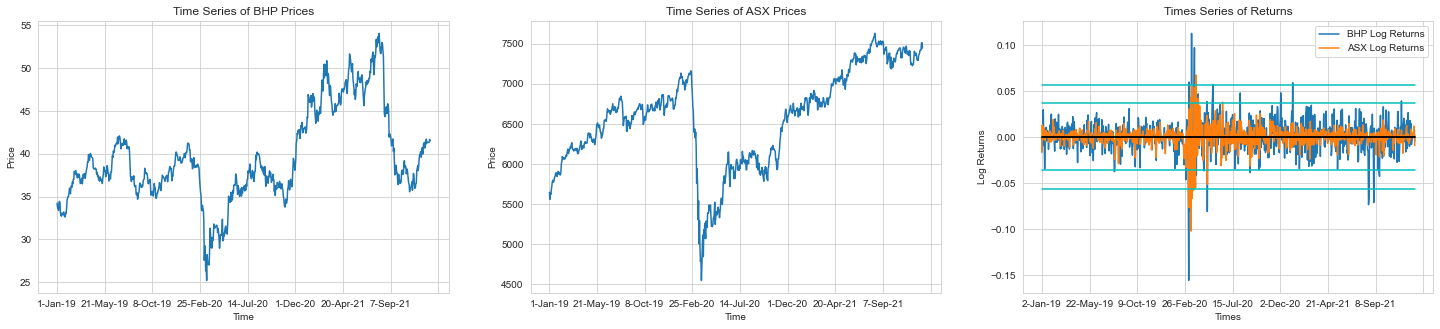

In [14]:
NOSD = 3  # Number of Standard Deviations
mu = rets.mean()
sgm = rets.std()

fig = plt.figure(figsize=(25, 5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

df['BHP Closing Price'].plot(ax=ax1)
ax1.set_title("Time Series of BHP Prices")
ax1.set_xlabel("Time")
ax1.set_ylabel("Price")

df['ASX Closing Price'].plot(ax=ax2)
ax2.set_title("Time Series of ASX Prices")
ax2.set_xlabel("Time")
ax2.set_ylabel("Price")

rets.plot(ax=ax3)
ax3.set_title("Times Series of Returns")
ax3.set_xlabel("Times")
ax3.set_ylabel("Log Returns")
ax3.plot(rets.index, len(rets)*[mu], color='k')
ax3.plot(rets.index, len(rets)*[mu+NOSD*sgm], color='c')
ax3.plot(rets.index, len(rets)*[mu-NOSD*sgm], color='c')

plt.show()

In [15]:
# Calculating log returns of the risk-free asset
price_data['Treasury Yield log returns'] = np.log(price_data['30yr Treasury yield (daily)'] + 1.0)
price_data.head()

,BHP Closing Price,ASX Closing Price,30yr Treasury yield (daily),S&P500 Closing Price,BHP Log Returns,ASX Log Returns,S&P500 Log Returns,Treasury Yield log returns
Date,,,,,,,,
1-Jan-19,34.23,5646.369,0.01,2506.85,NaN,NaN,NaN,0.00995
2-Jan-19,33.68,5557.755,0.01,2510.03,-0.016198,-0.015818,0.001268,0.00995
3-Jan-19,33.68,5633.405,0.01,2447.89,0.000000,0.013520,-0.025068,0.00995
4-Jan-19,33.38,5619.355,0.01,2531.94,-0.008947,-0.002497,0.033759,0.00995
7-Jan-19,34.39,5683.189,0.01,2549.69,0.029809,0.011296,0.006986,0.00995


In [16]:
# Calculating the excess returns of the risky assets over the risk-free rate
price_data['BHP Excess Returns'] = price_data['BHP Log Returns'] - price_data['Treasury Yield log returns']
price_data['ASX Excess Returns'] = price_data['ASX Log Returns'] - price_data['Treasury Yield log returns']
price_data['S&P500 Excess Returns'] = price_data['S&P500 Log Returns'] - price_data['Treasury Yield log returns']
price_data.head()

,BHP Closing Price,ASX Closing Price,30yr Treasury yield (daily),S&P500 Closing Price,BHP Log Returns,ASX Log Returns,S&P500 Log Returns,Treasury Yield log returns,BHP Excess Returns,ASX Excess Returns,S&P500 Excess Returns
Date,,,,,,,,,,,
1-Jan-19,34.23,5646.369,0.01,2506.85,NaN,NaN,NaN,0.00995,NaN,NaN,NaN
2-Jan-19,33.68,5557.755,0.01,2510.03,-0.016198,-0.015818,0.001268,0.00995,-0.026149,-0.025769,-0.008683
3-Jan-19,33.68,5633.405,0.01,2447.89,0.000000,0.013520,-0.025068,0.00995,-0.009950,0.003569,-0.035019
4-Jan-19,33.38,5619.355,0.01,2531.94,-0.008947,-0.002497,0.033759,0.00995,-0.018898,-0.012447,0.023809
7-Jan-19,34.39,5683.189,0.01,2549.69,0.029809,0.011296,0.006986,0.00995,0.019859,0.001345,-0.002964


In [17]:
# Data Frame of excess returns
excess_rets = price_data[['BHP Excess Returns', 'ASX Excess Returns']].dropna()
excess_rets.head()

,BHP Excess Returns,ASX Excess Returns
Date,,
2-Jan-19,-0.026149,-0.025769
3-Jan-19,-0.009950,0.003569
4-Jan-19,-0.018898,-0.012447
7-Jan-19,0.019859,0.001345
8-Jan-19,-0.008788,-0.003068


#### Question 5, 6

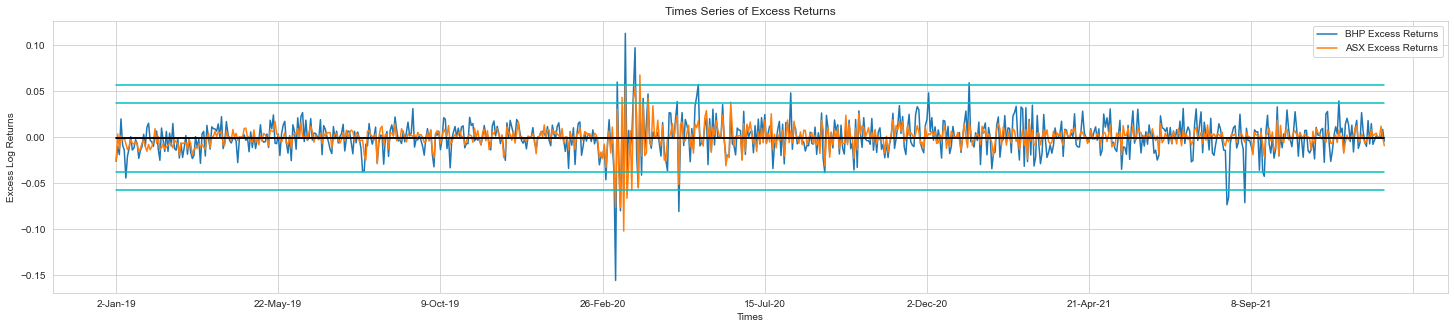

In [18]:
NOSD = 3  # Number of Standard Deviations
mu = excess_rets.mean()
sgm = excess_rets.std()

fig = plt.figure(figsize=(25, 5))
ax1 = plt.subplot()
excess_rets.plot(ax=ax1)

ax1.set_title("Times Series of Excess Returns")
ax1.set_xlabel("Times")
ax1.set_ylabel("Excess Log Returns")
ax1.plot(excess_rets.index, len(excess_rets)*[mu], color='k')
ax1.plot(excess_rets.index, len(excess_rets)*[mu+NOSD*sgm], color='c')
ax1.plot(excess_rets.index, len(excess_rets)*[mu-NOSD*sgm], color='c')

plt.show()

#### Question 7

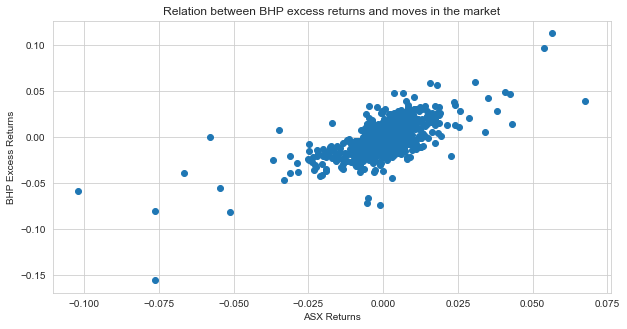

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(price_data['ASX Log Returns'].dropna(), excess_rets['BHP Excess Returns'])
plt.xlabel("ASX Returns")
plt.ylabel("BHP Excess Returns")
plt.title("Relation between BHP excess returns and moves in the market")
plt.show()

#### Question 8

In [20]:
excess_rets['BHP Excess Returns'].describe()

count    783.000000
mean      -0.000466
std        0.018971
min       -0.155653
25%       -0.010611
50%        0.000000
75%        0.009947
max        0.112833
Name: BHP Excess Returns, dtype: float64

In [21]:
excess_rets['ASX Excess Returns'].describe()

count    783.000000
mean      -0.000359
std        0.012332
min       -0.102026
25%       -0.005529
50%        0.000309
75%        0.005165
max        0.067655
Name: ASX Excess Returns, dtype: float64

#### Question 9

We can observe some interesting features from the time series plot of the excess returns and their respective descriptive statistics. It is evident from the time series plot in question 5/6 that there are a lot of occurences of returns being larger than a 3 standard deviation move under the assumption of a normal distribution. These large outliers are often clustered together in periods of high volatility such as March 2020. When looking at the descriptive statistics we can also see that the maximum drawdown for each respective time series is larger than its maximum up move, -15.56% vs 11.28% for BHP and -10.20% vs 6.77% for the ASX. This combination of frequent large outliers and negative skew tells us that the returns most likely do not follow a normal distribution, in stead a t-distribution with a slight negative skew would be better as a potential model for the return data due to the fatter tails (larger kurtosis) present in the t-distribution.

## Simple Linear Regression Overview and Explanation of Further Calculations

A simple linear regression model is constructed as:

$$ Y = \alpha + \beta X + \epsilon $$

where
- X is the independent variable
- Y is the dependent variable
- $\epsilon$ is the error such that $Std[\epsilon]= \sigma$ and $Cov[\epsilon,X]=0$.

We assume that the errors are normally distributed i.e $\epsilon \sim \mathcal{N}(0,\sigma^2)$. This assumption permits us to use MLE methods and to calculate confidence intervals for estimated parameters.

The parameters $\alpha$ and $\beta$ can be estimated by:

$$ \mathbb{E}[Y] = \alpha + \beta \mathbb{E}[X]  \quad \Rightarrow \quad \alpha = \mathbb{E}[Y] - \beta \mathbb{E}[X]$$

and, using the bi-linear property of the Covariance:

$$ Cov[X,Y] = Cov[ X, \alpha + \beta X + \epsilon ] = \beta Var[X] $$

$$ \beta = \frac{Cov[X,Y]}{Var[X]} $$

If we have some observations $x_i$, we can use the linear regression as a model for the response variables (which are random) $Y_i = \alpha + \beta x_i + \epsilon_i$, where the $\epsilon_i$ are uncorrelated. The expectation $\mathbb{E}[Y_i]$ is intended as a conditional expectation $\mathbb{E}[Y_i|x_i]$.

If we have two sets of data $y_i$ and $x_i$ for $1 \leq i \leq n$, where $y_i$ are the realizations of $Y_i$, we call:
    $\bar x = \frac{1}{n} \sum_{i=1}^n x_i$ and $\bar y = \frac{1}{n} \sum_{i=1}^n y_i$.

We also define

$$ S_{xx} = \sum_{i=1}^n (x_i - \bar x)^2 \quad S_{yy} = \sum_{i=1}^n (y_i - \bar y)^2  \quad S_{xy} = \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y) $$

Where $S_{xx}$ is the variance of $X$, $S_{yy}$ is the variance of $Y$, and $S_{xy}$ is the covariance between $X$ and $Y$.

The estimator $\hat \beta$ and $\hat \alpha$ for $\beta$ and $\alpha$ are:

$$ \hat \beta = \frac{S_{xy}}{S_{xx}} \quad \quad \hat \alpha = \bar y - \beta \bar x $$

These estimators are the **least squares** estimators. They are also **MLE estimators** and **BLUE** (best linear unbiased estimators).
This means $\mathbb{E}[\hat \beta]=\beta$ and $\mathbb{E}[\hat \alpha]=\alpha$ (since they are unbiased). We also have:

$$ Var[\hat \beta] = \frac{\sigma^2}{S_{xx}} \quad Var[\hat \alpha] = \frac{\sigma^2}{n S_{xx}}\sum_{i=1}^n x_i^2 $$

and under the assumption of Normal errors, these estimators are also Normally distributed. (the square root of the variances above are called the "standard error" of $\hat \alpha$ and $\hat \beta$)
The residual estimator is $\hat \epsilon_i = y_i - \hat \alpha - \hat \beta x_i$. We can define the unbiased estimator of the variance as:

$$ S^2 = \frac{n}{n-2}\hat \sigma^2 = \frac{1}{n-2} \sum_{i=1}^n \epsilon_i^2 $$

If we let $\hat y_i = \hat \alpha + \hat \beta x_i$, then:

$$ S_{yy} = \sum_{i=1}^n (y_i - \bar y)^2 =\; \sum_{i=1}^n (\hat y_i - \bar y)^2 + \sum_{i=1}^n (y_i - \hat y_i)^2
=\; \frac{S^2_{xy}}{S_{xx}} + \sum_{i=1}^n \hat \epsilon_i^2 .$$

We can define the **coefficient of determination $r^2$** such that $0 \leq r^2 \leq 1$, as


$$ r^2 = \frac{\sum_{i=1}^n (\hat y_i - \bar y)^2}{\sum_{i=1}^n (y_i - \bar y)^2}  $$
$$ r^2 = \frac{S_{xy}^2}{S_{xx}S_{yy}} $$
$$ r^2 =  1 - \frac{\sum_{i=1}^n (\hat \epsilon_i)^2}{\sum_{i=1}^n (y_i - \bar y)^2} $$

In [22]:
X = excess_rets['ASX Excess Returns'].values
Y = excess_rets['BHP Excess Returns'].values
print(f"Our dependent variable Y is the {excess_rets.columns[0]} data and our independent variable X is the {excess_rets.columns[1]} data")

Our dependent variable Y is the BHP Excess Returns data and our independent variable X is the ASX Excess Returns data


#### Question 10

In my analysis I will use $\alpha$ (instead of $\beta_1$ to represent the intercept) and $\beta$ (instead of $\beta_2$) to represent the coefficient of the indepenedent variable.

In [23]:
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(Y)
Sxx = (X-x_mean) @ (X-x_mean)
Syy = (Y-y_mean) @ (Y-y_mean)
Sxy = (X-x_mean) @ (Y-y_mean)

# Calculating estimates of Beta and Alpha
beta_hat = Sxy/Sxx
alpha_hat = y_mean - beta_hat * x_mean
print(f"beta: {beta_hat} and alpha: {alpha_hat}")

# Calculating residuals
epsilon = Y - beta_hat * X - alpha_hat

# Unbiased estimator of Variance
S2 = epsilon @ epsilon / (n-2)
S = np.sqrt(S2)
print(f"sigma: {S}")

var_beta = S2/Sxx                 # variance of beta
var_alpha = (X @ X ) * S2/(Sxx * n)  # variance of alpha
s_b = np.sqrt(var_beta)           # standard error for beta
s_a = np.sqrt(var_alpha)          # standard error for alpha
R2 = Sxy**2 / (Sxx*Syy)

print("Standard Error for beta: ", s_b)
print("Standard Error for alpha: ", s_a)
print(f"R squared: {R2}")

beta: 1.0601279530195185 and alpha: -8.558212206141334e-05
sigma: 0.013755648960029853
Standard Error for beta:  0.0398867527272679
Standard Error for alpha:  0.0004917947635973002
R squared: 0.474927575869713


#### Question 11

In [24]:
# Unbiased estimator of Variance
S2 = epsilon @ epsilon / (n-2)
S = np.sqrt(S2)
print(f"Variance of errors: {S2}, Standard deviation of errors: {S}\n")
print(f"The standard error of the regression: {S}")

Variance of errors: 0.00018921787831157038, Standard deviation of errors: 0.013755648960029853

The standard error of the regression: 0.013755648960029853


#### Question 12

Our estimated regression model now becomes:

$$ \hat{Z}_{BHP_t} = -8.558212206141334 \times 10^{-5} + 1.060128 \times Z_{ASX_t} $$

#### Question 13

In [25]:
fitted_values = alpha_hat + beta_hat*X

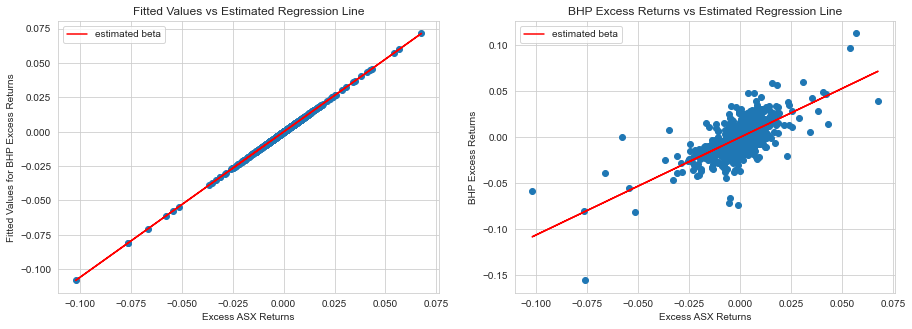

In [26]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)

ax.scatter(X, fitted_values)
ax.plot(X, alpha_hat + beta_hat*X, color="red", label="estimated beta")
ax.set_title("Fitted Values vs Estimated Regression Line")
ax.set_xlabel("Excess ASX Returns")
ax.set_ylabel("Fitted Values for BHP Excess Returns")
ax.legend(loc='upper left')

ax1.scatter(X, Y)
ax1.plot(X, alpha_hat + beta_hat*X, color="red", label="estimated beta")
ax1.set_title("BHP Excess Returns vs Estimated Regression Line")
ax1.set_xlabel("Excess ASX Returns")
ax1.set_ylabel("BHP Excess Returns")
ax1.legend(loc='upper left')

plt.show()

#### Question 14

In [27]:
print(f"The mean excess return of BHP stock is {Y.mean()}\n")
print(f"The predicted mean excess return of BHP stock under our regression model is {fitted_values.mean()}")

The mean excess return of BHP stock is -0.0004656801444225476

The predicted mean excess return of BHP stock under our regression model is -0.00046568014442254776


#### Question 15

In [28]:
print(f"The mean of the model residuals: {epsilon.mean()}")

The mean of the model residuals: 4.608205402339411e-19


#### Question 16

In [29]:
squared_residuals = epsilon**2
SSR = sum(squared_residuals)
print(f"The sum of squared residuals: SSR = {SSR}")

The sum of squared residuals: SSR = 0.14777916296133634


#### Question 17

In [30]:
Sxx = (X-x_mean) @ (X-x_mean)
Syy = (Y-y_mean) @ (Y-y_mean)
Sxy = (X-x_mean) @ (Y-y_mean)

R2 = Sxy**2 / (Sxx*Syy)
print(f"R squared: {R2}")

R squared: 0.474927575869713


From our simple regression model we observed an R squared value of around 47.49%, this infers that 47.49% of the variation in BHP excess returns can be explained by excess returns in the ASX. For very noisy time series such as stock returns, a model with an R squared value of close to 50% can be considered a relatively well fit model.

#### Question 17

In [31]:
adjusted_R2 = 1 - ((1-R2)*(n-1)/(n-2))
print(f"Adjusted R squared: {adjusted_R2}")

Adjusted R squared: 0.47425526802831697


When calculating the adjusted R squared for our simple linear regression we received a value of around 47.43%, this is close to exactly the value we got for the standard R squared. This is to be expected since the adjusted R squared value penalises a model for including extra variables which do not contain much explanatory power or statistical significance. Since our model hasn't changed and there is only one dependent variable, our adjusted R squared should be in line with the R squared value.

#### Question 19

In [32]:
import statsmodels.api as sm

X = X.reshape(-1,1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     706.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.30e-111
Time:                        10:01:30   Log-Likelihood:                 2246.1
No. Observations:                 783   AIC:                            -4488.
Df Residuals:                     781   BIC:                            -4479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.558e-05      0.000     -0.174      0.862      -0.001       0.001
x1             1.0601      0.040     26.578      0.000       0.982       1.138
==============================================================================
Omnibus:                       82.339   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.110
Skew:                          -0.219   Prob(JB):                    1.87e-108
Kurtosis:                       6.875   Cond. No.                         81.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 20

In [33]:
#excess_rets.to_excel('BHP_DATA.xlsx')

excel = pd.read_excel('BHP_DATA.xlsx', sheet_name='Sheet3')

excel

,Unnamed: 0,Coefficients,Standard Error,t Stat,P-value,Lower 95%,Upper 95%,Lower 95.0%,Upper 95.0%
0,Intercept,-0.000086,0.000492,-0.174020,8.618948e-01,-0.001051,0.000880,-0.001051,0.000880
1,X Variable 1,1.060128,0.039887,26.578447,2.302250e-111,0.981830,1.138426,0.981830,1.138426


From our excel output we can see our calculated parameters and statistical values are similar to what has been calculated using the statsmodels OLS class. 

Our estimated parameter for Beta has a very large t-statistic of 26.578 (at the far right tail of the distribution), low standard error of 0.039887 and therefore an extremely small p-value below the usual significance threshhold of 0.05 and even 0.01. This means that the dependent variable of ASX excess returns has a significant explanatory impact on BHP excess returns.

On the other hand our estimated intercept paramater has a t-statistic of -0.174 (close to the centre of the distribution) and a large p-value of 0.86189. These values tell us that the intercept is not signficantly different from 0 (0 is contained within the 95% CI interval) and provides minimal explanatory power on BHP excess returns.

## Part 2

In [34]:
excess_rets_2 = price_data[['BHP Excess Returns', 'ASX Excess Returns', 'S&P500 Excess Returns']].dropna()
X = excess_rets_2[['ASX Excess Returns', 'S&P500 Excess Returns']].values
Y = excess_rets_2['BHP Excess Returns'].values

X = sm.add_constant(X)
model_2 = sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     353.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.13e-110
Time:                        10:01:30   Log-Likelihood:                 2246.6
No. Observations:                 783   AIC:                            -4487.
Df Residuals:                     780   BIC:                            -4473.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.429e-05      0.000     -0.151      0.880      -0.001       0.001
x1             1.0807      0.046     23.511      0.000       0.990       1.171
x2            -0.0360      0.040     -0.899      0.369      -0.115       0.043
==============================================================================
Omnibus:                       84.255   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.494
Skew:                          -0.234   Prob(JB):                    3.14e-112
Kurtosis:                       6.940   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 21

In [35]:
alpha_hat = model_2.params[0]
beta_hat_1 = model_2.params[1]
beta_hat_2 = model_2.params[2]

n = len(X)
epsilon_2 = Y - beta_hat_1*X[:,1] - beta_hat_2*X[:,2] - alpha_hat
S2 = epsilon_2 @ epsilon_2 / (n - 2 - 1)
sgm = np.sqrt(S2)

print(f"The multiple regression parameter estimates are:\n alpha = {alpha_hat}\n beta 1 = {beta_hat_1}\n beta 2 = {beta_hat_2}\n Variance of errors = {S2}\n Standard deviation of errors = {sgm}")

The multiple regression parameter estimates are:
 alpha = -7.429405378801899e-05
 beta 1 = 1.0806670811457835
 beta 2 = -0.03601975405701683
 Variance of errors = 0.0001892641463683339
 Standard deviation of errors = 0.013757330641092184


#### Question 22

In [36]:
n = len(X)
epsilon_2 = Y - beta_hat_1*X[:,1] - beta_hat_2*X[:,2] - alpha_hat
S2 = epsilon_2 @ epsilon_2 / (n - 2 - 1)
sgm = np.sqrt(S2)

print(f"Variance of errors = {S2}\nStandard deviation of errors = {sgm}\n")
print(f"Standard Error of multiple regression model: {sgm}")

Variance of errors = 0.0001892641463683339
Standard deviation of errors = 0.013757330641092184

Standard Error of multiple regression model: 0.013757330641092184


In [37]:
alpha_hat_se = model_2.bse[0]
beta_hat_1_se = model_2.bse[1]
beta_hat_2_se = model_2.bse[2]

print(f"The multiple regression parameter standard errors are:\n alpha = {alpha_hat_se}\n beta 1 = {beta_hat_1_se}\n beta 2 = {beta_hat_2_se}")

The multiple regression parameter standard errors are:
 alpha = 0.0004920149585613798
 beta 1 = 0.045964632415384336
 beta 2 = 0.04004483302817796


#### Question 23, 24

In [38]:
R2 = model_2.rsquared
adjusted_R2 = model_2.rsquared_adj

print(f"The coefficients of determination for the multiple regression model are:\n R2 = {R2}\n Adjusted R2 = {adjusted_R2}")

The coefficients of determination for the multiple regression model are:
 R2 = 0.4754716560057586
 Adjusted R2 = 0.47412671153397845


From the multiple regresion model we observe an R squared value of 47.55% and an adjusted R squared value of 47.41%. As in the simple linear regression these figures represent the amount of variation in BHP Excess returns that is explained by the matrix of independent variables being ASX excess returns and S&P500 excess returns.

In comparison to the simple linear regression model, the R squared value has increased slightly and the adjusted R squared value has decreased slightly. This tells us that the multiple regression model represents a better fit to the data according to the R squared value, however it has less overall explanatory power as evidenced by the lower adjusted R squared.

#### Question 25

By comparing the regression results between the simple linear regression and the mutliple linear regression we can observe the impact of including the S&P Excess returns as an additional regressor. 

As mentioned in questions 23 and 24, the R squared and adjusted R squared values for the multiple regression model have changed slightly compared to the original model. However these changes are not significant enough to draw any concrete inference about the difference in fit/explanatory power between the models. Where we can observe a significant difference is in the significance of the dependent variables as well as the F statistic and it's p-value for each respective model.

We can observe in the multiple regression model that the estimated coefficient for the excess S&P 500 returns is statistically insignificant with a p-value of 0.369. The estimated coefficient for the excess ASX returns is significant in both models. Bearing these results in mind we can see that the F statistic for both models is highly significant with P-values close to 0, for reference The F-test of overall significance indicates whether the linear regression model provides a better fit to the data than a model that contains no independent variables. It essentially tests whether the dependent variables are **jointly** significant. Applying this idea to our multiple regression model, we see that the F test is significant but the individual t-test for beta 2 is insignificant. This somewhat conflicting result tells us that there is likely multicollinearity between the excess ASX returns and the excess S&P returns, this multicollinearity occurs when two independent variables are highly correlated with each other. The effect of multicollinearity means that the addition of the excess S&P500 returns as an explanatory variable is redundant due to the underlying explanatory factor (overall market returns/conditions) for the BHP excess returns would be common between both indexes.

To finalise this observation, we observe that on a relative basis the F statistic for the multiple regression model is less significant than the simple regression model and the information criterion (AIC and BIC) for the multiple regression are less negative compared to the simple linear regression. Both these facts highlight that the multiple regression model represents a worse fit and that the inclusion of the excess S&P500 returns has little to no extra explanatory impact as an additional regressor.